## EECS 491 Assignment 1 {-}

Due Fri Feb 1 before midnight. 100 points total. (Note: the new due date differs from the syllabus, so that you have a full two weeks.)

### Submitting assignments to Canvas {-}

- For jupyter notebooks, submit the .ipynb file and a pdf export of the notebook.  Make sure the pdf represents the latest state of your notebook.  If your are not using notebooks, writeup your assignment using latex and submit a pdf with your code.  The writeup should include relevant code with description if it can fit on a page.  Do not include binaries or large data files.

- Use the following format for filenames:
  - `EECS491-A1-yourcaseid.ipynb`
  - `EECS491-A1-yourcaseid.pdf`

- If you have more than these two files, put all your files in a directory named `EECS491-A1-yourcaseid`. Then zip the directory and submit it with the name `EECS491-A1-yourcaseid.zip`.  Do not use other compression formats.

Some of questions below aren't specified in great detail and you may need to spend sometime making sense of the questions themselves, which you can do from the reads and other sources.  You also might need to fill in some blanks or make some assumptions.  The spirit behind this approach is explained in [The Problem with Problems](http://web.mit.edu/6.969/www/readings/mazur.pdf) by Eric Mazur, which I encourage everyone to read.

### Q1. Basic probability (10 pts) {-}

1.1. Prove (5 pts)
$$ p(x,y|z) = p(x|z)p(y|x,z) $$

1.1. Answer
$$
p(x,y|z) = \frac{p(x,y,z)}{p(z)} = \frac{p(x,y,z)}{p(x,z)}\frac{p(x,z)}{p(z)} = p(x|z)p(y|x,z)
$$

1.2. Prove (5 pts)
$$p(x|y,z) = \frac{p(y|x,z)p(x|z)}{p(y|z)} $$
1.2. Answer 
$$
p(x|y,z) = \frac{p(x,y|z)}{p(y|z)} = \frac{\frac{p(x,y,z)}{p(x,z)}\frac{p(x,z)}{p(z)}}{p(y|z)}=\frac{p(x|z)p(y|x,z)}{p(y|z)}
$$


### Q2. Independence (10 pts) {-}

2.1 Show that independence is not transitive, i.e. 
$a \perp b \wedge b \perp c \nRightarrow a \perp c$. Define a joint probability distribution $p(a,b,c)$ for which the previous expression holds and provide an interpretation. (5 pts)

Flip two coins. $a$ is first coin head, $b$ is the second coin head and event $c$ is the same event with $a$. In the case, $a$ and $b$ are independet, $b$ and $c$ are also independet. However, $c$ is denpend on $a$($c$ equal to $a$). Therfore, independece is not transtive.
$$
p(a) = 0.5  \\
p(b) = 0.5 \\
p(c) = 0.5\\
p(a,b) = 0.25 \\
p(b,c) = 0.25 \\
but, p(a,c) = 0.5\\
$$

2.2 Show that conditional independence does not imply marginal independence, i.e. $a \perp b | c \nRightarrow a \perp b$. Again provide an example. (5 pts)

Assume we have two conis, one coni has the probability 0.9 to head when flip, the other is a regualr coin(0.5 for head). I choose a coin at random and toss it twice. Event $a$ is that fisrt conin toss result is head. Event $b$ is the second coind toss result is head. Event $c$ is select the regular coni. 

$$
p(a|c) = 0.5 \\
p(b|c) = 0.5 \\
p(a,b|c) = 0.25
$$

$$
\begin{align}
p(a) &= p(a)p(a|c=1) + p(a)p(c=0) \\ &= 0.5 * 0.5 + 0.9 * 0.5 = 0.7 \\ 
\end{align}
$$

$$
simialr, p(b) = 0.7
$$

$$
\begin{align}
p(a,b) &= p(a,b|c=1)p(c=1) + p(a,b|c=0)p(c=0) \\ &= p(a|c=1)p(b|c=1)p(c=1)+p(a|c=0)p(b|c=0)p(c=0) \\ &= 0.25 * 0.5 + 0.9*0.9* 0.25 \\ &= 0.2025 \\ 
\end{align} 
$$
$$
p(a,b|c) \neq p(a,b)
$$


### Q3. Inspector Clouseau re-revisited (20 pts) {-}

3.1 Write a program to evaluate $p(B|K)$ in Example 1.3 in Barber. Write your code and choose your data representations so that it is easy to use it to solve the remaining questions. Show that it correctly computes the value in the example. (5 pts)

In [4]:
using Random, Distributions

In [103]:
function g(p_first, p_second, p_f_s, p_f_S, p_F_s, p_F_S)
    p1 = p_first * (p_second*p_F_S+(1-p_second)*p_F_s)
    p2 = p_first * (p_second*p_F_S + (1-p_second)*p_F_s)  + (1-p_first)*(p_second*p_f_S + (1-p_second)*p_f_s)
    return p1/p2
end


g (generic function with 1 method)

In [104]:
pB =0.6 
pM = 0.2

pKbm=0.3
pKbM= 0.2
pKBm =0.6
pKBM = 0.1


g(pB,pM,pKbm,pKbM,pKBm,pKBM)

0.7281553398058251

3.2 Define a different distribution for $p(K|M,B)$.  Your new distribution should result in the outcome that $p(B|K)$ is either $<0.1$ or $>0.9$, i.e. reasonably strong evidence.  Use the original values of $p(B)$ and $p(M)$ from the example.  Provide (invent) a reasonble justification for the value of each entry in $p(K|M,B)$. (5 pts)

In [4]:
pB =0.6 
pM = 0.2

pKbm= 0.1
pKbM= 0.1
pKBm =0.9
pKBM = 0.1

g(pB,pM,pKbm,pKbM,pKBm,pKBM)

0.9173553719008264

3.3 Derive the equation for $p(M|K)$. (5 pts)

$$
\begin{align}
p(M|K) &= \sum_{b}p(b,M|K) \\ &= \sum_{b}\frac{p(b,M,K)}{p(K)} \\ &=\frac{ \sum_{b} p(K|b,M)p(b,M)}{\sum_{m,b}p(K|b,m)p(b,m)} = \frac{p(M)\sum_{b}p(K|b,M)p(b)}{\sum_{m}p(m)\sum_{b}p(K|b,m)p(b)}
\end{align}
$$

3.4 Calculate it's value for both the original $p(K|M,B)$ and the one you defined yourself. Is it possible to provide a summary of the main factors that contributed to the value?  Why/Why not?  Explain. (5 pts)

In [5]:
pB =0.6 
pM = 0.2

pKbm=0.3
pKbM= 0.2
pKBm =0.6
pKBM = 0.1


println(g(pM,pB,pKbm,pKBm,pKbM,pKBM))


pKbm=0.1
pKbM= 0.1
pKBm =0.9
pKBM = 0.1

println(g(pM,pB,pKbm,pKBm,pKbM,pKBM))


0.06796116504854369
0.04132231404958678


The main factor that contributed to the value who is the muder is the probability of knif used given one is murder and the other is not murder and the probability of knif used given none is murder. If we want to get a large value of $p(M|K)$, we should enlarge the value $p(knif used|M is murder, B is not murder)$, and decrease the value of  $p(K|b,m)$. Take a look at the formula $\frac{p(M)\sum_{b}p(K|b,M)p(b)}{\sum_{m}p(m)\sum_{b}p(K|b,m)p(b)}$, if we want to increase the value when  $p(B)$ and $p(M)$ is constant, the only two factors we can change is $p(K|b,M)$, $p(K|b,m)$.

### Q4. Biased views (20 pts) {-}

4.1 Write a program that calculates the posterior distribution of the $\theta$ (probability of heads) from the Binomial distribution given $y$ heads out of $n$ trials.  Feel to use a package where the necessary distributions are defined as primitives. (5 pts)

In [81]:
using Random, Distributions, Optim, Interact, Plots


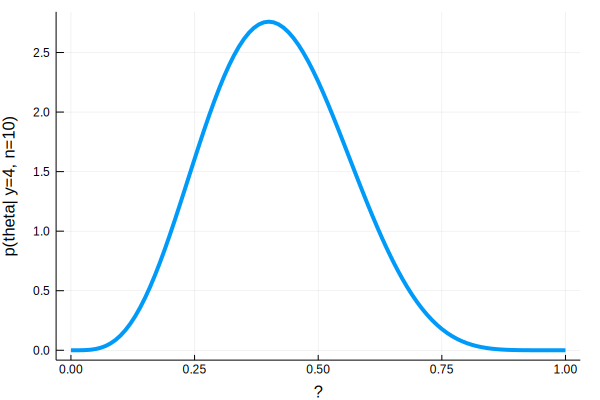

In [105]:
f(θ, y, n) = binomial(n, y) * θ^y * (1-θ)^(n-y) * (n+1)
r=0:0.01:1
n = 10
y = 4
# Bernoulli(θ)
# trials = rand(Bernoulli(θ), n)


plot(r, f.(r, y, n), lw=4,
     ylabel="p(theta| y=$y, n=$n)", xlabel="θ", legend=false)

4.2 Imagine three different views on the coin bias:
- "I believe strongly that the coin is biased to either mostly heads or mostly tails."
- "I believe strongly that the coin is unbiased".
- "I don't know anything about the bias of the coin."  

Define and plot prior distributions that expresses each of these beliefs.  Provide a brief explanation. (5 pts)

"I believe strongly that the coin is biased to either mostly heads or mostly tails."

**The probability is around 0.95.**

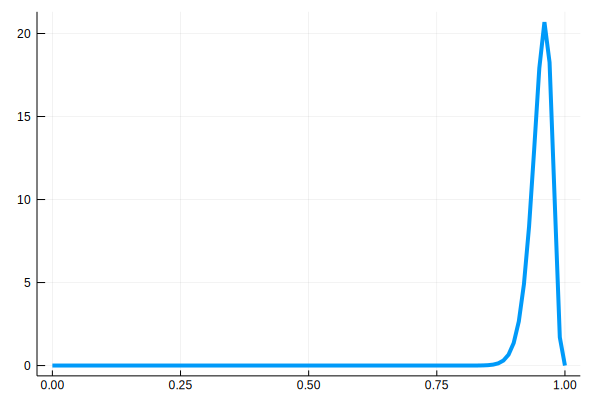

In [106]:
α=100
β=5
plot(0:0.01:1, pdf.(Beta(α, β), 0:0.01:1), lw=4, legend=false)

"I believe strongly that the coin is unbiased".

**The probability is around 0.5.**

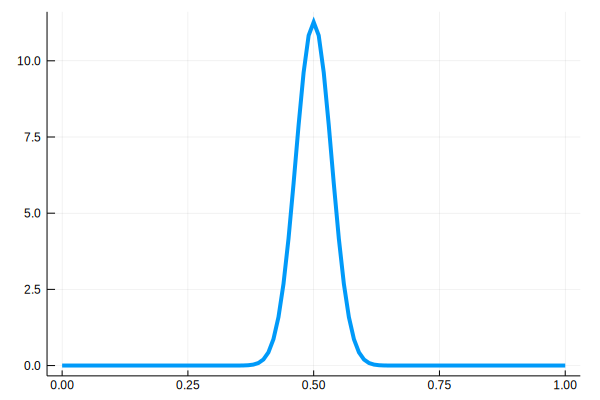

In [107]:
α=100
β=100
plot(0:0.01:1, pdf.(Beta(α, β), 0:0.01:1), lw=4, legend=false)

"I don't know anything about the bias of the coin."  

**We just randomly generate a probability.**

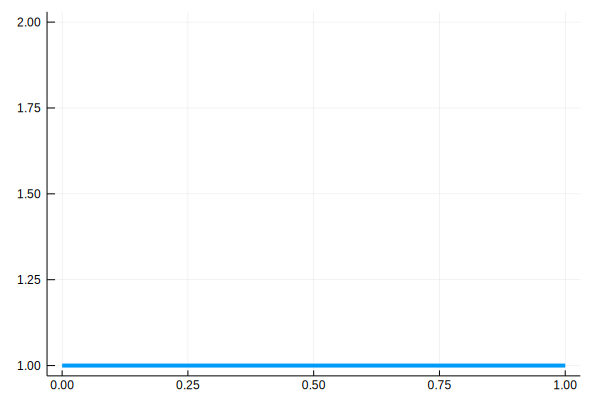

In [108]:
plot(0:0.01:1, pdf.(Beta(1, 1), 0:0.01:1), lw=4, legend=false)

4.3 Perform Bernoulli trials where one of these views is correct.  Show how the posterior distribution of $\theta$ changes for each view for $n=0, 1, 2, 5, 10, \textrm{and} 100$.  Each view should have its own plot, with the plots of the posterior after different numbers of trials overlayed. (5 pts)

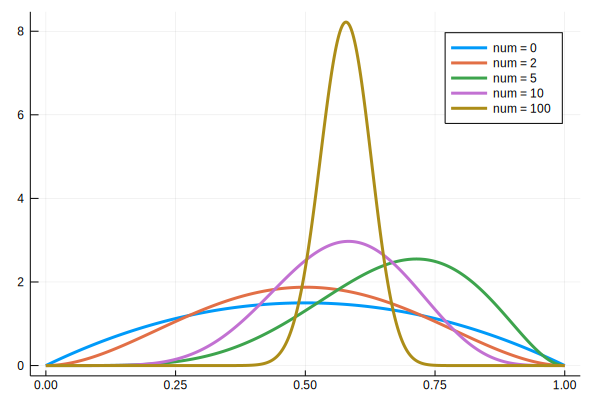

In [109]:
θ = 0.5
totaln = 1000
trials = rand(Bernoulli(θ), totaln)

α=2
β=2
r=0:0.001:1

p = []


n = 0
y = 0
push!(p, pdf.(Beta(α+y, β+n-y), r)) 


n = 2
y = sum(trials[1:n])
push!(p, pdf.(Beta(α+y, β+n-y), r)) 


n = 5
y = sum(trials[1:n])
push!(p, pdf.(Beta(α+y, β+n-y), r)) 

n = 10
y = sum(trials[1:n])
push!(p, pdf.(Beta(α+y, β+n-y), r)) 


n = 100
y = sum(trials[1:n])
push!(p, pdf.(Beta(α+y, β+n-y), r)) 

names = ["num = 0" "num = 2" "num = 5" "num = 10" "num = 100"]

plot(r, p,labels=["num = 0" "num = 2" "num = 5" "num = 10" "num = 100"],lw=3)

4.4 Is it possible that each view will always arrive at an accurate estimate of $\theta$?  How might you determine which view is most consistent with the data after $n$ trials? (5 pts)

**No, it is impossible that each view always arrive at an accuracte estimate. 100 trails is the most consistent one. The probability density of theta around 0.5 is larger, the view is more consistent with data**

### Q5. Inference using the Poisson distribution (20 pts) {-}

Suppose you are observing a series of events that occur at the following times (in seconds): 0.53, 0.65, 0.91, 1.19, 1.30, 1.33, 1.90, 2.01, 2.48.

5.1 Model the rate at which the events are produced using a Poisson distribution where $\lambda$ is the number of events $n$ observed per unit time (1 second).  Show the likelihood equation and plot it for three different values of $\lambda$: less, about equal, and greater than what you estimate (intuitively) from the data. (5 pts)

$$
P(x|\lambda) = e^{-\lambda} \frac{\theta^x}{x!} 
$$

In this example, the times of events occur in three separately seconds are 3, 4, 2 times. 

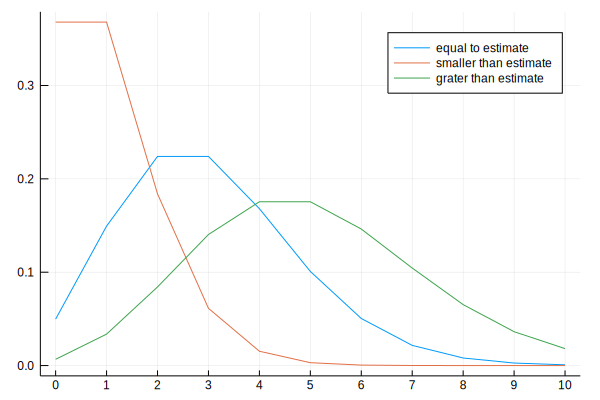

In [110]:
po = [pdf.(Poisson(3), 0:10),pdf.(Poisson(1), 0:10),pdf.(Poisson(5), 0:10)]
plot(0:10, po, xticks=0:10,label=["equal to estimate" "smaller than estimate" "grater than estimate"])

5.2 Derive the posterior distribution of $\lambda$ assuming a Gamma prior (usually defined with parameters $\alpha$ and $\beta$).  The posterior should have the form $p(\lambda | n, T, \alpha, \beta)$ where $T$ is the total duration of the observation period and $n$ is the number of events observed within that period. (5 pts)

$$
p(\lambda|n,T, \alpha,\beta) = \frac{p(n,T|\lambda, \alpha,\beta)p(\lambda,\alpha,\beta)}{p(n,T,\alpha,\beta)} = \frac{p(n,T|\lambda,\alpha,\beta)p(\lambda,\alpha,\beta)}{\sum_{i=0}^{\infty}p(n,T|\lambda_i,\alpha,\beta)p(\lambda_i,\alpha,\beta)} = \frac{e^{-\lambda}\cdot\frac{\lambda^{\frac{n}{T}}}{(\frac{n}{T}!)}\cdot\frac{\beta^\alpha\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)}}{\sum_{i=0}^{\infty}e^{-\lambda_i}\cdot\frac{\lambda_i^{\frac{n}{T}}}{(\frac{n}{T}!)}\cdot\frac{\beta^\alpha\lambda_i^{\alpha-1}e^{-\beta\lambda_i}}{\Gamma(\alpha)}}
$$

5.3 Show that the Gamma distribution is a *conjugate prior* for the Poisson distribution, i.e. it is also a Gamma distribution, but defined by parameters $\alpha'$ and $\beta'$ that are functions of the prior and likelihood parameters. (5 pts)

The Possion distribution is $p(x|\theta) = \frac{\theta^xe^{-\theta}}{x!}$, the Gamma prior distribution is $p(\theta|\alpha,\beta)=\frac{\beta^\alpha\theta^{\alpha-1}e^{-\beta\theta}}{\Gamma(\alpha)}$

$$ L(x_1,...,x_n|\theta) = \prod_{i=1}^{n}{\frac{\theta^{x_i}e^{-\theta}}{x!}} = \frac{e^{-n\theta}\theta^{\sum_{i=1}^{n}x_i}}{\prod_{i=1}^{n} x_i!}  $$

$$
p(\lambda|\mathbf{x},\alpha,\beta) \propto L(x_1,...,x_n|\theta) \cdot p(\theta|\alpha,\beta) \propto e^{-(\beta+n)\theta}\lambda^{\alpha+\sum_{i=1}^nx_i-1} \rightarrow (\lambda|\mathbf{x},\alpha,\beta) \sim Gamma(\alpha+\sum_{i=1}^nx_i,\beta+n)
$$
So Gsmma distribution is the conjugate prior for the Poisson distribution. 

5.4 Plot the posterior distribution for the data above at times $T$ = 0, 0.5, and 1.5.  Overlay the curves on a single plot.  Comment how it is possible for your beliefs to change even though no new events have been observed. (5 pts)

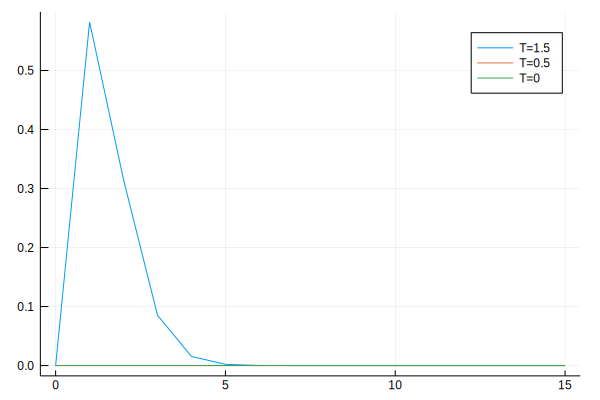

In [111]:
function postperior(n,T,alpha,beta)
    
    u = 0
    if T != 0
        u = n/T
    end
    norm_constant = 0    
    for i in 0:1:15
        norm_constant = norm_constant + pdf.(Poisson(u),i)*pdf(Gamma(alpha,1/beta),i)
    end
    
    if norm_constant == 0
        y=[]
        for i in 0:1:15
            push!(y,0)
        end
        return y
    else
        return pdf.(Poisson(u),0:1:15).*pdf.(Gamma(alpha,1/beta),0:1:15) /norm_constant
    end
end

plot(0:1:15,postperior(6,1.5,2,2),label="T=1.5")
plot!(0:1:15,postperior(0,0.5,2,2),label="T=0.5")
plot!(0:1:15,postperior(0,0,2,2),label="T=0")

### Q6. Exploration (20 pts) {-}

In these problems, you are meant to do creative exploration.  Define and explore a:

6.1 discrete inference problem (10 pts)

6.2 continuous inference problem (10 pts)

This is meant to be open-ended; you should not feel the need to write a book chapter; but neither should you just change the numbers in one of the problems above.  After doing the readings and problems above, you should pick a concept you want to understand better or an simple modeling idea you want to try out.  The general idea is for you to teaching yourself (and potentially a classate) about something.  You don't necessarily have to know what that is when you start, but you should be able to express what you learned.

Here is the grading rubric:
- Were the problem clearly described and concise? (3 pts)
- Were the relevant concepts clearly explained? (3 pts)
- Did the problem go beyond or is distinct from what was already convered in the questions above? (4 pts)

You can use the readings and other sources for inspiration, but here are a few ideas:
- An inference problem using categorical data
- A disease for which there are two different tests
- A two-dimensional continuous inference problem


6.1 discrete inference problem (10 pts)

Assume 5% of men and 0.25% women are color blindness. Draw a person from the population of color blindness, what is the probability of the person is male. 

We can assume event A is that the person is male, event B is that the person is female. And the event C is that the person draw from population have color blindness. 

Assume $P(A)=p(B)=0.5$
So, $P(C|A) = 0.05$, $p(C|B) = 0.025$

$P(A|C) = \frac{P(A)P(C|A)}{P(A)P(C|A)+P(B)P(C|B)} = 0.95$

The problem is similar with the problem which is coered in the course of disease questions.

6.2 continuous inference problem (10 pts)

Assume we have a group data about the health. We have some type of data about the age, height, weight, blood pressure, heart rate. We want to know the person is health or not. 


$$P(health) = P(height|health) P(weight|helath)  P(heart rate|health)  P(blood pressuire|health)  P(health)$$

Beacuse the height, weight, heart rate, blood pressure is continuous value, so we should use the Gaussian to get their distribution. 

The problem is distinct from what was already convered. 
